# Introduction

<font color = 'blue'>
Content: 

1. [Libraries](#1)
1. [RDS](#2)
1. [Regions Defined For Each Polygons](#3)
1. [Converting Turkish Chracters to English](#4)
1. [Load Data](#5)
1. [Final Map](#6)
1. [References](#7)



<a id = "1"></a><br>
# 1. Libraries

In [1]:
# libraries
library(ggplot2)
library(mapproj)
library(tidyverse)
library(sp) # Konumsal (Spatial) veri için

Loading required package: maps

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::map()    masks maps::map()



<a id = "2"></a><br>
# 2. RDS
First of all, we choose Turkey from the link http://www.gadm.org/country and choose R (SpatialPolygonsDataFrame) as the file format. As a note, you cannot use the data you download here for commercial purposes.

In [2]:
tur<- readRDS("../input/turkey-rds-map/gadm36_TUR_1_sp.rds")


Warning message in wkt(obj):
“CRS object has no comment”


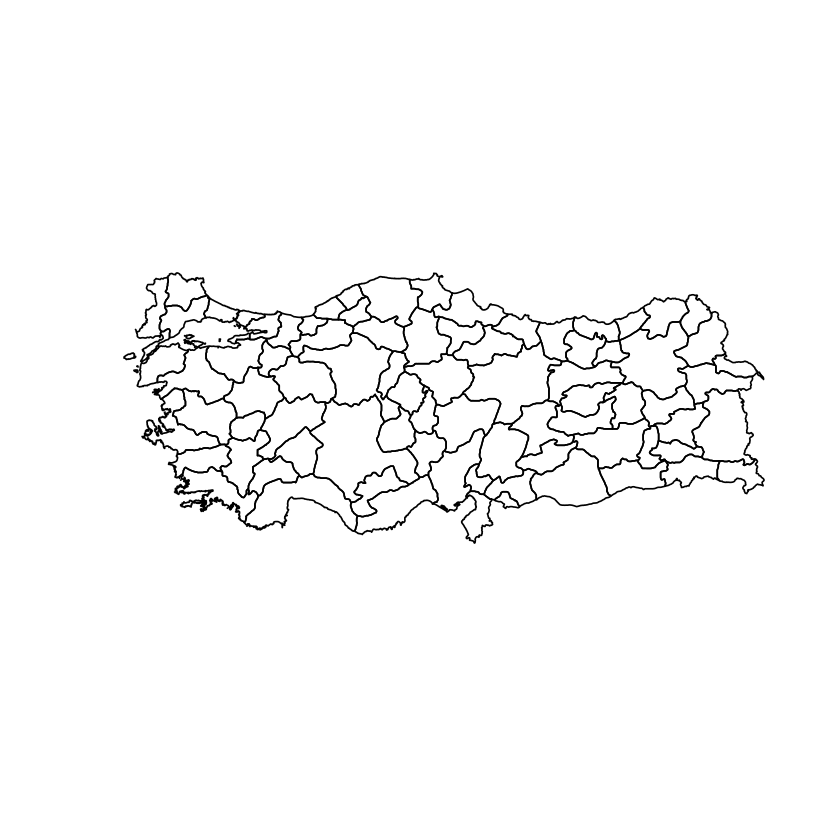

In [3]:
plot(tur)

In [4]:
tur@data %>% as_tibble() %>% head(10) 

GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
TUR,Turkey,TUR.1_1,Adana,Seyhan,NA,Il,Province,NA,TR.AA
TUR,Turkey,TUR.2_1,Adiyaman,Adıyaman,NA,Il,Province,NA,TR.AD
TUR,Turkey,TUR.3_1,Afyon,Afyonkarahisar,NA,Il,Province,NA,TR.AF
TUR,Turkey,TUR.4_1,Agri,Ağri|Karaköse,NA,Il,Province,NA,TR.AG
TUR,Turkey,TUR.5_1,Aksaray,NA,NA,Il,Province,NA,TR.AK
TUR,Turkey,TUR.6_1,Amasya,NA,NA,Il,Province,NA,TR.AM
TUR,Turkey,TUR.7_1,Ankara,Ancara|Angora,NA,Il,Province,NA,TR.AN
TUR,Turkey,TUR.8_1,Antalya,Adalia|Anatolia,NA,Il,Province,NA,TR.AL
TUR,Turkey,TUR.9_1,Ardahan,NA,NA,Il,Province,NA,TR.AR


<a id = "3"></a><br>
## 3. Regions Defined For Each Polygons

Regions defined for each Polygons



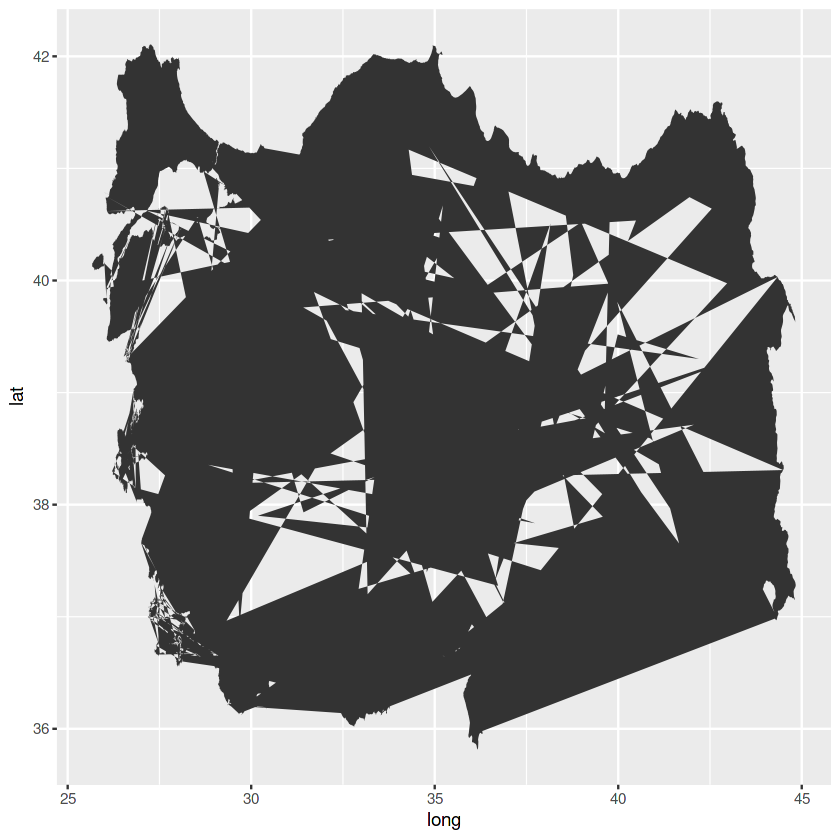

In [5]:
ggplot(tur,aes(x=long,y=lat))+geom_polygon()

Regions defined for each Polygons



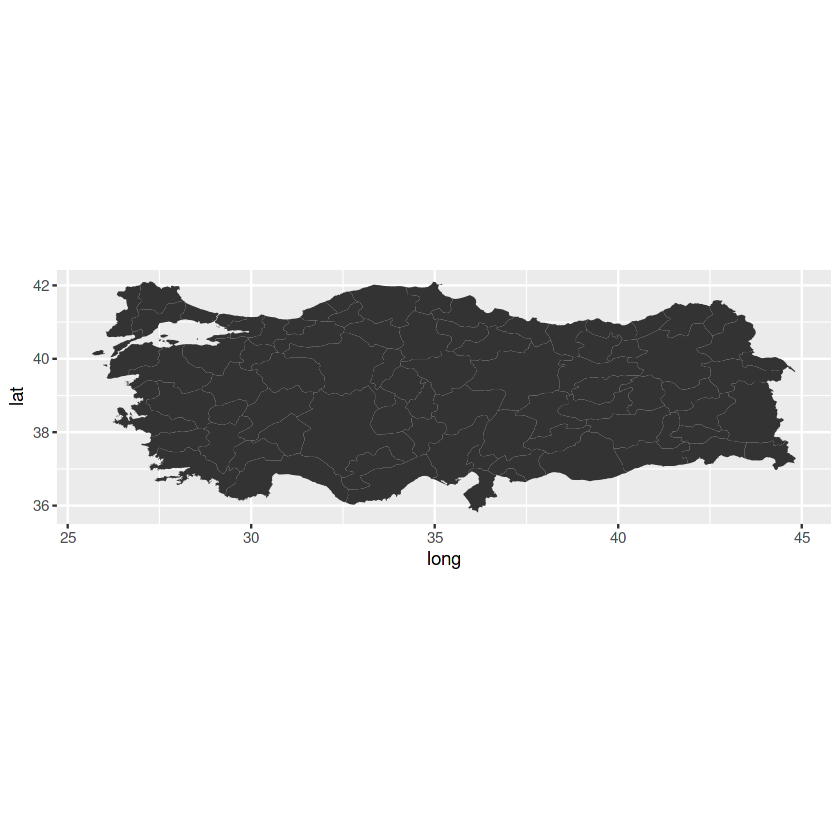

In [6]:
ggplot(tur, aes(x = long, y = lat)) + geom_polygon(aes(group = group)) + coord_fixed()

In [7]:
tur_for <- fortify(tur) # Bu fonksiyon 'sp' paketinin içinde. Şehirleri ayırmak için de fortify fonksiyonunu kullanacağız
head(tur_for) #her ilin lattitude ve longitude değerleri gösterililyor

Regions defined for each Polygons



,long,lat,order,hole,piece,id,group
,<dbl>,<dbl>,<int>,<lgl>,<fct>,<chr>,<fct>
1,35.41454,36.58850,1,FALSE,1,1,1.1
2,35.41459,36.58820,2,FALSE,1,1,1.1
3,35.41434,36.58820,3,FALSE,1,1,1.1
4,35.41347,36.58820,4,FALSE,1,1,1.1
5,35.41347,36.58792,5,FALSE,1,1,1.1
6,35.41236,36.58792,6,FALSE,1,1,1.1


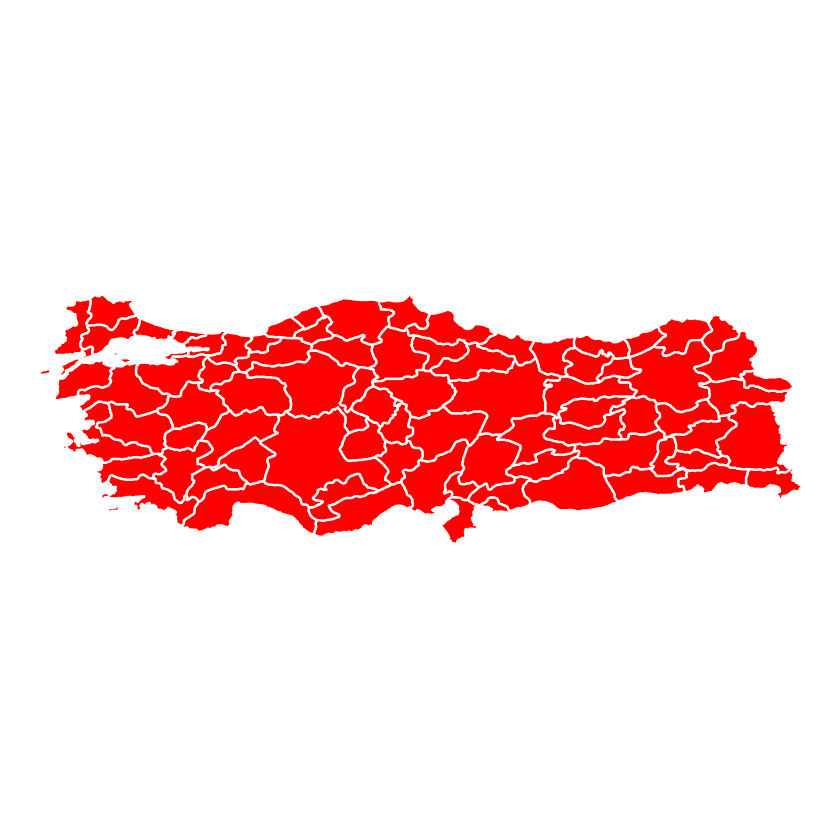

In [8]:
ggplot(tur_for) + geom_polygon(aes(x = long, y = lat,group = group),color = "white",fill = "red") +
theme_void() + coord_fixed()

<a id = "4"></a><br>
# 4. Load Data

In [9]:
library("readxl") # for reading excel file

In [10]:
# data
df <- read_excel("../input/forestland-turkey-2019/forestland.xlsx")

<a id = "5"></a><br>
## 5. Converting Turkish Chracters to English 

In [11]:
turkceden_ingilizceye <- function(dataset){
  turkce_harfler<- c("Ç","Ş","Ğ","İ","Ü","Ö","ç","ş","ğ","ı","ü","ö")
  ingilizce_harfler<- c("C","S","G","I","U","O","c","s","g","i","u","o")
  dataset=mgsub(turkce_harfler,ingilizce_harfler,dataset)
  return(dataset)
}


# Multiple gsub function

mgsub <- function(pattern, replacement, x, ...) {
  n = length(pattern)
  if (n != length(replacement)) {
    stop("pattern and replacement do not have the same length.")
  }
  result = x
  for (i in 1:n) {
    result <- gsub(pattern[i],replacement[i],result)
  }
  return(result)
}

tur@data$NAME_1 <- turkceden_ingilizceye(tur@data$NAME_1 )
tur@data$NAME_1 <- gsub("K. Maras", "Kahramanmaras",tur@data$NAME_1 )
tur@data$NAME_1 <- gsub("Kinkkale","Kirikkale",tur@data$NAME_1 )
tur@data$NAME_1 <- gsub("Zinguldak", "Zonguldak", tur@data$NAME_1 )

In [12]:
df$cities = turkceden_ingilizceye(df$cities)

df %>% as_tibble

cities,hectare
<chr>,<dbl>
Istanbul,240688
Tekirdag,101174
Edirne,103014
Kirklareli,254463
Balikesir,632038
Canakkale,480465
Izmir,475779
Aydin,326605
Denizli,588672


In [13]:
id_and_cities<- data_frame(id = rownames(tur@data), cities = tur@data$NAME_1) %>% left_join(df, by = "cities")

head(id_and_cities)

Warning message:
“`data_frame()` was deprecated in tibble 1.1.0.
Please use `tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


id,cities,hectare
<chr>,<chr>,<dbl>
1,Adana,593660
12,Adiyaman,158581
23,Afyon,278836
34,Agri,5905
45,Aksaray,23469
56,Amasya,220681


<a id = "6"></a><br>
# 6. Final Map

In [14]:
# To create the final map, we combine the TUR_for with the id_and_cities_ist

final_map <- left_join(tur_for, id_and_cities, by = "id")
head(final_map)


,long,lat,order,hole,piece,id,group,cities,hectare
,<dbl>,<dbl>,<int>,<lgl>,<fct>,<chr>,<fct>,<chr>,<dbl>
1,35.41454,36.58850,1,FALSE,1,1,1.1,Adana,593660
2,35.41459,36.58820,2,FALSE,1,1,1.1,Adana,593660
3,35.41434,36.58820,3,FALSE,1,1,1.1,Adana,593660
4,35.41347,36.58820,4,FALSE,1,1,1.1,Adana,593660
5,35.41347,36.58792,5,FALSE,1,1,1.1,Adana,593660
6,35.41236,36.58792,6,FALSE,1,1,1.1,Adana,593660


The hectare was around 1.200.000, therefore I adjusted the limit 1.300.000

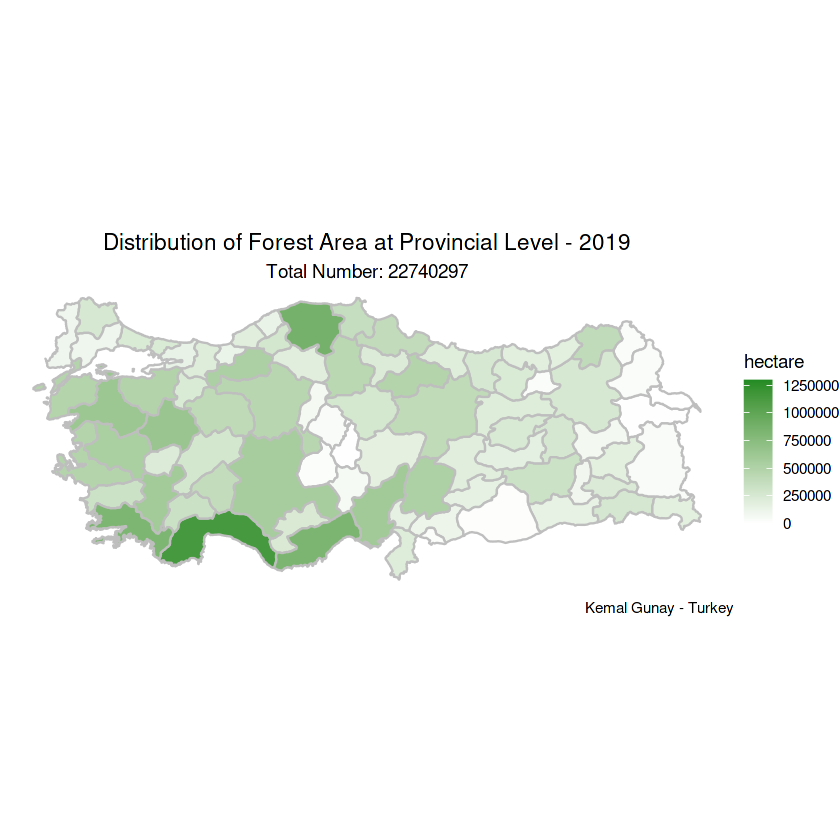

In [15]:
ggplot(final_map) +geom_polygon( aes(x = long, y = lat, group = group, fill = hectare), color = "grey") +
coord_map() +theme_void() + labs(title = "Distribution of Forest Area at Provincial Level - 2019",subtitle = paste0("Total Number: ", sum(df$hectare)),caption = "Kemal Gunay - Turkey") +
  
  scale_fill_gradient2(low = "greenyellow", high = 'forestgreen', limits = c(0,1300000)) + 
theme(plot.title = element_text(hjust = 0.5),plot.subtitle = element_text(hjust = 0.5))

<a id = "7"></a><br>
# 7. References
* https://rpubs.com/sercandogan/turkeymap
* https://web.ogm.gov.tr/ekutuphane/Sayfalar/Istatistikler.aspx?RootFolder=%2Fekutuphane%2FIstatistikler%2FOrmanc%C4%B1l%C4%B1k%20%C4%B0statistikleri&FolderCTID=0x012000301D182F8CB9FC49963274E712A2DC00&View={4B3B693B-B532-4C7F-A2D0-732F715C89CC}
* https://www.r-bloggers.com/2019/05/a-detailed-guide-to-ggplot-colors/